In [1]:
##Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [136]:
train=pd.read_excel("0000000000002419_training_ccpp_x_y_train.xlsx")

In [16]:
train.shape

(7176, 5)

In [7]:
train.isnull().sum()

TEMP                        0
Exhasut_Vaccum              0
Ambient_Pressure            0
Relative _Humidity          0
Electrical_Hourly_Output    0
dtype: int64

In [8]:
train.dtypes

TEMP                        float64
Exhasut_Vaccum              float64
Ambient_Pressure            float64
Relative _Humidity          float64
Electrical_Hourly_Output    float64
dtype: object

In [137]:
df=train.copy()

In [138]:
df.head()

,TEMP,Exhasut_Vaccum,Ambient_Pressure,Relative _Humidity,Electrical_Hourly_Output
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [119]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TEMP                      7176 non-null   float64
 1   Exhasut_Vaccum            7176 non-null   float64
 2   Ambient_Pressure          7176 non-null   float64
 3   Relative _Humidity        7176 non-null   float64
 4   Electrical_Hourly_Output  7176 non-null   float64
dtypes: float64(5)
memory usage: 280.4 KB


(7176, 5)

In [21]:
df.dtypes

TEMP                        float64
Exhasut_Vaccum              float64
Ambient_Pressure            float64
Relative _Humidity          float64
Electrical_Hourly_Output    float64
dtype: object

In [26]:
df.isnull().sum()

TEMP                        0
Exhasut_Vaccum              0
Ambient_Pressure            0
Relative _Humidity          0
Electrical_Hourly_Output    0
dtype: int64

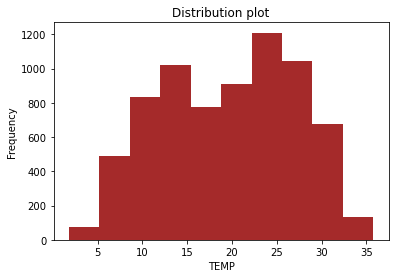

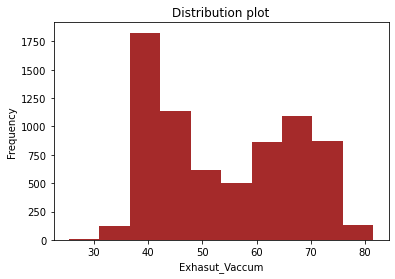

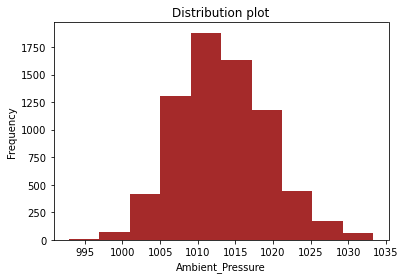

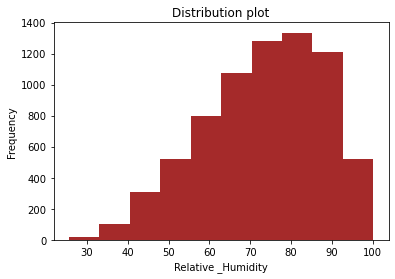

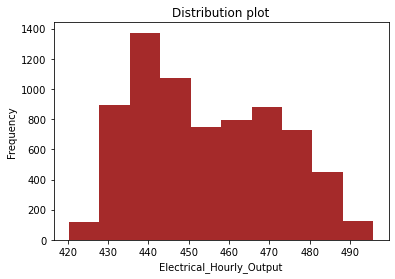

In [129]:
for x in df:
    plt.hist(df[x],color="brown")
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.title("Distribution plot")
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


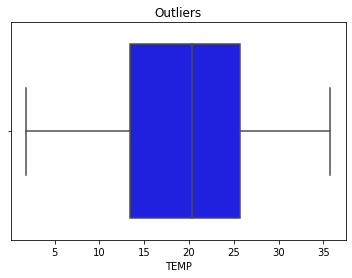

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


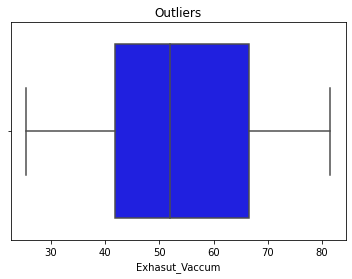

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


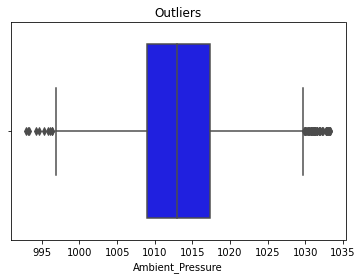

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


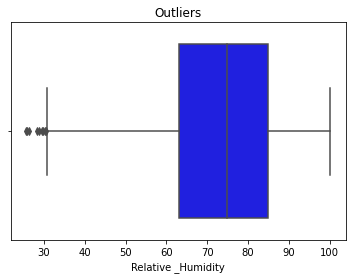

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


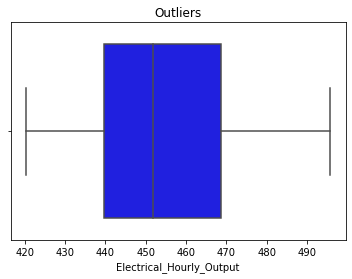

In [131]:
for x in df:
    sns.boxplot(df[x],color="blue")
    plt.xlabel(x)
    plt.title("Outliers")
    plt.show()

In [30]:
IQR_Amb=df.Ambient_Pressure.quantile(0.75)-df.Ambient_Pressure.quantile(0.25)
LL_Amb=df.Ambient_Pressure.quantile(0.25)-1.5*IQR_Amb
UL_Amb=df.Ambient_Pressure.quantile(0.75)+1.5*IQR_Amb

print("IQR of Ambient_Pressure: ",IQR_Amb)
print("LL of Ambient_Pressure: ",LL_Amb)
print("UL of Ambient_Pressure: ",UL_Amb)



IQR of Ambient_Pressure:  8.159999999999968
LL of Ambient_Pressure:  996.8600000000001
UL of Ambient_Pressure:  1029.5


In [32]:
LL_Amb_Length=len(df[df.Ambient_Pressure<LL_Amb])
UL_Amb_Length=len(df[df.Ambient_Pressure>UL_Amb])
print(LL_Amb_Length)
print(UL_Amb_Length)

15
73


In [33]:
UpperLimit_perc=UL_Amb_Length/len(df)
UpperLimit_perc

0.007629598662207358

In [34]:
LowerLimit_perc=LL_Amb_Length/len(df)
LowerLimit_perc

0.0015677257525083612

In [35]:
df.shape

(9568, 5)

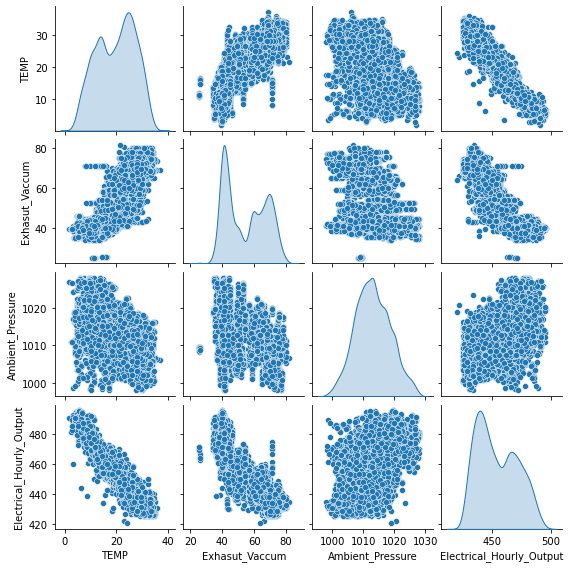

In [105]:
columns=["TEMP","Exhasut_Vaccum","Ambient_Pressure","Electrical_Hourly_Output"]
sns.pairplot(df[columns],height=2,kind="scatter",diag_kind="kde")
plt.show()

In [132]:
corrmat=df.corr()
corrmat

,TEMP,Exhasut_Vaccum,Ambient_Pressure,Relative _Humidity,Electrical_Hourly_Output
TEMP,1.000000,0.845382,-0.509115,-0.545312,-0.948457
Exhasut_Vaccum,0.845382,1.000000,-0.417346,-0.315595,-0.869620
Ambient_Pressure,-0.509115,-0.417346,1.000000,0.101367,0.519887
Relative _Humidity,-0.545312,-0.315595,0.101367,1.000000,0.392988
Electrical_Hourly_Output,-0.948457,-0.869620,0.519887,0.392988,1.000000


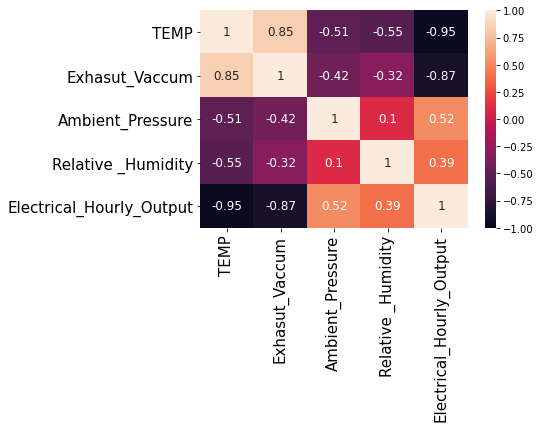

In [134]:
sns.heatmap(corrmat,annot=True,vmax=1.0,vmin=-1.0,annot_kws={"size":12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

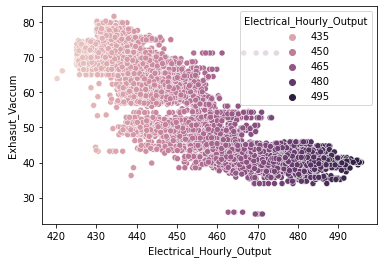

In [122]:
sns.scatterplot(x="Electrical_Hourly_Output",y="Exhasut_Vaccum",data=df,hue="Electrical_Hourly_Output")
plt.show()

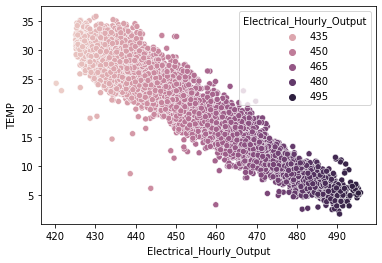

In [12]:
sns.scatterplot(x="Electrical_Hourly_Output",y="TEMP",data=df,hue="Electrical_Hourly_Output")
plt.show()

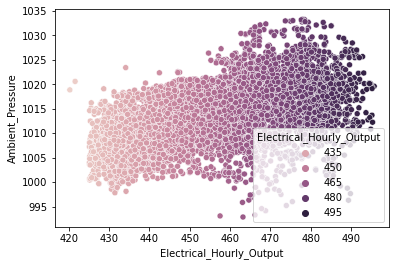

In [13]:
sns.scatterplot(x="Electrical_Hourly_Output",y="Ambient_Pressure",data=df,hue="Electrical_Hourly_Output")
plt.show()

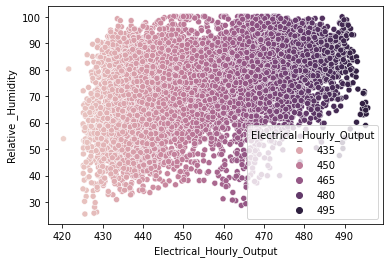

In [15]:
sns.scatterplot(x="Electrical_Hourly_Output",y="Relative _Humidity",data=df,hue="Electrical_Hourly_Output")
plt.show()

In [139]:
X=df.drop(["Electrical_Hourly_Output"],axis=1)


In [140]:
Y=df[["Electrical_Hourly_Output"]]


In [141]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)


print("The shape of X-Train: ",x_train.shape)
print("The shape of X-Test: ",x_test.shape)
print("The shape of Y-Train: ",y_train.shape)
print("The shape of Y-Test: ",y_test.shape)



The shape of X-Train:  (5740, 4)
The shape of X-Test:  (1436, 4)
The shape of Y-Train:  (5740, 1)
The shape of Y-Test:  (1436, 1)


### SGD MODEL

In [107]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
powerplant_SGD_model=sgdr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [67]:
SCORE1=sgdr.score(x_train,y_train)
print(SCORE1)

0.9285254213382661


In [108]:
powerplant_SGD_MODEL_predictions=powerplant_SGD_model.predict(x_test)
actual_powerplant_SGD_MODEL=y_test

In [69]:
from statsmodels.tools.eval_measures import rmse
##rmse=rmse(actual_powerplant_SGD_MODEL,powerplant_SGD_MODEL_predictions)
MSE1=mean_squared_error(actual_powerplant_SGD_MODEL,powerplant_SGD_MODEL_predictions)
rmse=np.sqrt(MSE1)


In [70]:
print(rmse)
print(MSE1)

4.537989673011925
20.593350272362876


In [71]:
Columns=["MODEL","RMSE","SCORE"]
table=pd.DataFrame(columns=Columns)
final=pd.Series({"MODEL":"PowerPlant SGD model",
                  "RMSE":rmse,
                   "SCORE":SCORE1,
                  })
table=table.append(final,ignore_index=True)
table

,MODEL,RMSE,SCORE
0,PowerPlant SGD model,4.53799,0.928525


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TEMP                      7176 non-null   float64
 1   Exhasut_Vaccum            7176 non-null   float64
 2   Ambient_Pressure          7176 non-null   float64
 3   Relative _Humidity        7176 non-null   float64
 4   Electrical_Hourly_Output  7176 non-null   float64
dtypes: float64(5)
memory usage: 280.4 KB


### PCA MODEL

In [31]:
x=df.iloc[:,:4]

In [32]:
x

,TEMP,Exhasut_Vaccum,Ambient_Pressure,Relative _Humidity
0,8.58,38.38,1021.03,84.37
1,21.79,58.20,1017.21,66.74
2,16.64,48.92,1011.55,78.76
3,31.38,71.32,1009.17,60.42
4,9.20,40.03,1017.05,92.46
...,...,...,...,...
7171,9.32,37.73,1022.14,79.49
7172,11.20,41.38,1021.65,61.89
7173,29.80,69.34,1009.36,64.74
7174,16.37,54.30,1017.94,63.63


In [33]:
#convert it to numpy arrays
X=x.values

In [34]:
from sklearn.preprocessing import scale

In [35]:
#Scaling the values
X = scale(X)

In [36]:
from sklearn.decomposition import PCA


In [37]:
pca2 = PCA(n_components=4)
pca2.fit(X)

PCA(n_components=4)

In [38]:
#The amount of variance that each PC explains
var= pca2.explained_variance_ratio_
var


array([0.61131736, 0.22680009, 0.13644235, 0.0254402 ])

[61.13 83.81 97.45 99.99]


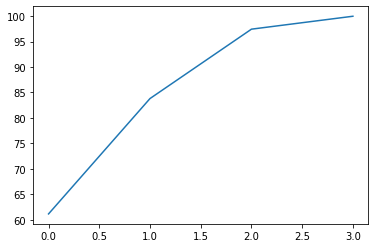

In [39]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca2.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1) # cumulative

In [42]:
pca_ev=pca2.components_
pca_ev

array([[ 0.61405565,  0.55950925, -0.40468643, -0.38224854],
       [-0.05049502,  0.10003856, -0.64904228,  0.75245376],
       [-0.16800205, -0.59377166, -0.62806124, -0.47407764],
       [-0.76952013,  0.56954096, -0.14322044, -0.25089795]])

In [43]:
pca_evl=pca2.explained_variance_
pca_evl

array([2.44561024, 0.90732681, 0.54584548, 0.10177497])

In [72]:
pca=PCA(n_components=3)
pca.fit(x)
x1=pca.fit_transform(x)
x1

array([[-22.28194872,   6.7763819 ,  -3.98984475],
       [  7.21888338,   2.22461281,  -4.55287405],
       [ -7.91650417,   0.08126866,   2.80759224],
       ...,
       [ 19.14003445,  -7.0277528 ,   0.50518338],
       [  5.0072163 ,   8.24440845,  -4.85070173],
       [ 26.78704249,   9.58920553,   1.74824666]])

In [73]:
x1=np.round(x1,2)
x1

array([[-22.28,   6.78,  -3.99],
       [  7.22,   2.22,  -4.55],
       [ -7.92,   0.08,   2.81],
       ...,
       [ 19.14,  -7.03,   0.51],
       [  5.01,   8.24,  -4.85],
       [ 26.79,   9.59,   1.75]])

In [74]:
Y=df[["Electrical_Hourly_Output"]]

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x1,Y,test_size=0.2,random_state=0)


print("The shape of X-Train: ",x_train.shape)
print("The shape of X-Test: ",x_test.shape)
print("The shape of Y-Train: ",y_train.shape)
print("The shape of Y-Test: ",y_test.shape)



The shape of X-Train:  (5740, 3)
The shape of X-Test:  (1436, 3)
The shape of Y-Train:  (5740, 1)
The shape of Y-Test:  (1436, 1)


In [76]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
powerplant_SGD_pcamodel=sgdr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [77]:
SCORE_PCA=sgdr.score(x_train,y_train)
print(SCORE_PCA)

0.8335221589564492


In [78]:
powerplant_SGD_PCA_MODEL_predictions=powerplant_SGD_pcamodel.predict(x_test)
actual_powerplant_SGD_PCA_MODEL=y_test

In [79]:
from statsmodels.tools.eval_measures import rmse
##rmse=rmse(actual_powerplant_SGD_MODEL,powerplant_SGD_MODEL_predictions)
MSE_PCA=mean_squared_error(actual_powerplant_SGD_PCA_MODEL,powerplant_SGD_PCA_MODEL_predictions)
rmse_PCA=np.sqrt(MSE_PCA)


In [80]:
print(rmse_PCA)
print(MSE_PCA)

7.030543745938034
49.428545363548395


In [81]:
final=pd.Series({"MODEL":"PowerPlant SGD PCA model",
                  "RMSE":rmse_PCA,
                   "SCORE":SCORE_PCA,
                  })
table=table.append(final,ignore_index=True)
table

,MODEL,RMSE,SCORE
0,PowerPlant SGD model,4.537990,0.928525
1,PowerPlant SGD PCA model,7.030544,0.833522


### VIF MODEL

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif=pd.DataFrame()
Vif["VIF FACTOR"]= [variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
Vif["FEATURES"]=df.columns
Vif.sort_values("VIF FACTOR",ascending=False).reset_index(drop=True)

,VIF FACTOR,FEATURES
0,3529.848909,Ambient_Pressure
1,2935.775611,Electrical_Hourly_Output
2,77.048942,Exhasut_Vaccum
3,48.026404,TEMP
4,40.971698,Relative _Humidity


In [82]:
powerplant_DF=df.drop(["Ambient_Pressure","Exhasut_Vaccum",],axis=1)

In [83]:
powerplant_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TEMP                      7176 non-null   float64
 1   Relative _Humidity        7176 non-null   float64
 2   Electrical_Hourly_Output  7176 non-null   float64
dtypes: float64(3)
memory usage: 168.3 KB


In [84]:
X=powerplant_DF.drop(["Electrical_Hourly_Output"],axis=1)


In [85]:
Y=powerplant_DF[["Electrical_Hourly_Output"]]


In [86]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

print("The shape of X-Train: ",x_train.shape)
print("The shape of X-Test: ",x_test.shape)
print("The shape of Y-Train: ",y_train.shape)
print("The shape of Y-Test: ",y_test.shape)

The shape of X-Train:  (5740, 2)
The shape of X-Test:  (1436, 2)
The shape of Y-Train:  (5740, 1)
The shape of Y-Test:  (1436, 1)


In [87]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
powerplant_SGD2_model=sgdr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [88]:
SCORE_VIF=sgdr.score(x_train,y_train)
SCORE_VIF

0.9206309594341339

In [89]:
powerplant_SGD2_model_predictions=powerplant_SGD2_model.predict(x_test)
actual_powerplant_SGD2_model=(y_test)

In [90]:
MSE3=mean_squared_error(actual_powerplant_SGD2_model,powerplant_SGD2_model_predictions)
rmse3=np.sqrt(MSE3)

In [91]:
rmse3

4.667414205522084

In [92]:
final=pd.Series({"MODEL":"PowerPlant SGD3 model",
                  "RMSE":rmse3,
                   "SCORE":SCORE1,
                  })
table=table.append(final,ignore_index=True)
table

,MODEL,RMSE,SCORE
0,PowerPlant SGD model,4.537990,0.928525
1,PowerPlant SGD PCA model,7.030544,0.833522
2,PowerPlant SGD3 model,4.667414,0.928525


In [93]:
Predicted_Power=powerplant_SGD2_model_predictions
print(Predicted_Power)

[431.5156984  477.60318977 466.03018514 ... 432.23646617 460.813257
 469.04904798]


#### PREDICTING ON TEST DATA

In [97]:
test=pd.read_csv("D:/DATA SCIENCE/Supervised Learning/Regression project practice/0000000000002419_test_ccpp_x_test.csv")

In [98]:
test.head()

,TEMP,Exhasut_Vaccum,Ambient_Pressure,Relative _Humidity,Unnamed: 4
0,11.95,42.03,1017.58,90.89,NaN
1,12.07,38.25,1012.67,81.66,NaN
2,26.91,74.99,1005.64,78.98,NaN
3,20.58,39.53,1005.68,62.09,NaN
4,16.78,37.20,1011.97,68.94,NaN


In [99]:
test=test.drop(["Unnamed: 4"],axis=1)

In [100]:
test=StandardScaler().fit_transform(test)

In [110]:
powerplant_SGD_TESTMODEL_predictions=powerplant_SGD_model.predict(test)
actual_powerplant_SGD_TESTMODEL=y_test

In [114]:
powerplant_SGD_TESTMODEL_predictions

array([470.42218847, 472.30355493, 434.10142584, ..., 439.44007429,
       451.1476248 , 447.55786064])